## Project: Customer Segmentation 
(Unsupervised learning)

In this project, we will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. The aim of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Now let's start. 

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("../Kaggle/customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, let's explore the data through visualizations and code to understand how each feature is related to the others. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Each Category represents as follows:

 - Fresh: Annual spending (m.u.) on fresh products (Continuous)
 - Milk: Annual spending (m.u.) on milk products (Continuous)
 - Grocery: Annual spending (m.u.) on grocery products (Continuous)
 - Frozen: Annual spending (m.u.)on frozen products (Continuous)
 - Detergents_Paper: Annual spending (m.u.) on detergents and paper products (Continuous)
 - Delicatessen: Annual spending (m.u.) on and delicatessen products (Continuous)
     - "A store selling cold cuts, cheeses, and a variety of salads, as well as a selection of unusual or foreign prepared foods."

In [2]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. 

In [3]:
#Select three indices of your choice you wish to sample from the dataset
indices = [20, 200, 400]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  17546   4519     4602    1066              2259          2124
1   3067  13240    23127    3941              9959           731
2   4446    906     1238    3576               153          1014

From the quantiles shown above, we can easily conclude that two customers ('1' , '2') belong to the second quantile,and the last customer ('0') belongs to the fourth quantile based on the 'Fresh' category. Therefore, in this sample, there are two establishments that are likely to be a market and restaurants. 

### Implementation: Feature Relevance
Next, let's do a supervised regression learner on a subset of the data with one feature removed to investigate if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

for feat in list(data.columns) :
    # Make a copy of the DataFrame, using the 'drop' function to drop a feature
    new_data = data.drop([feat], axis=1)

    # Split the data into training and testing sets(0.25) using 'one feature as the target

    X_train, X_test, y_train, y_test = train_test_split(new_data.values, data[feat].values, test_size=0.25, random_state=42)

    # Create a decision tree regressor and fit it to the training set
    dtr = DecisionTreeRegressor(random_state=42)

    dtr.fit(X_train, y_train)

    # Report the score of the prediction 
    score = dtr.score(X_test, y_test)
    print('R2 score for {} as dependent variable: {}'.format(feat, score))

R2 score for Fresh as dependent variable: -0.38574971020407384
R2 score for Milk as dependent variable: 0.15627539501732116
R2 score for Grocery as dependent variable: 0.6818840085440834
R2 score for Frozen as dependent variable: -0.21013589012491396
R2 score for Detergents_Paper as dependent variable: 0.27166698062685013
R2 score for Delicatessen as dependent variable: -2.254711537203931


Base on the results above, the negative R2 scores from "Fresh", "Frozen" and "Delicatessen" suggest that these features are necessary for identifying customers' spending habits because their variations can't be explained by the rest of features. The same goes to "Milk" and "Detergents_Paper" as well due to their relatively low R2 scores. As expected, Grocery' shows the highest score (0.682) compared with the rest of features. However, it will perhaps be less likely to give more insights about customers' spending habits. Let's dig in to get more insigths.  

### Visualize Feature Distributions
To get a better understanding of the dataset, let's construct a scatter matrix of each of the six product features present in the data. 

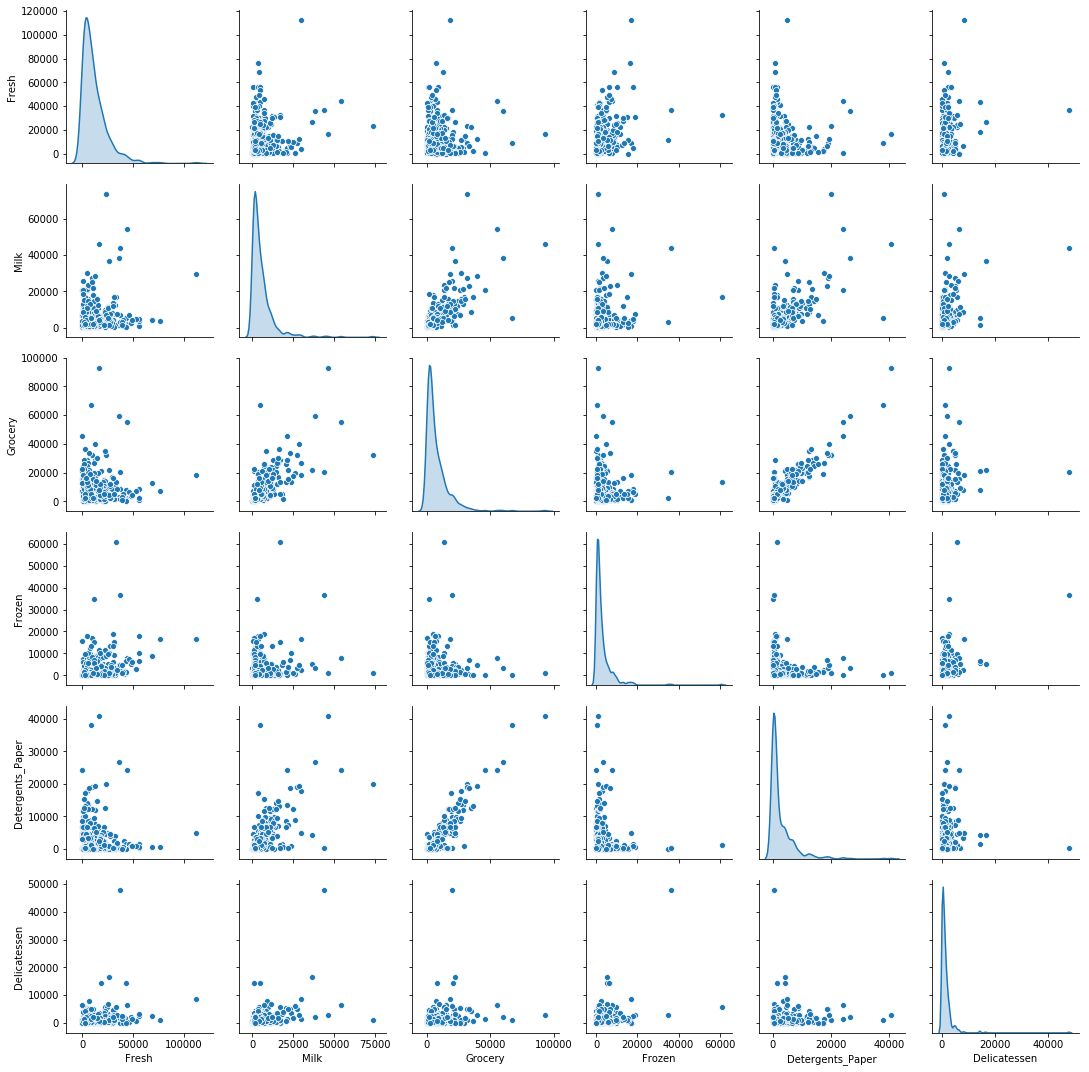

In [5]:
import seaborn as sns
# A scatter matrix for each pair of features in the data
sns.pairplot(data, diag_kind='kde')

This scatter matrix suggests that Grocery is likely to associate with Detergents_Paper and Milk consumption, as expected, which shows the strongest correlation to the other categories. Interestingly, every feature is not normally distributed due to the outliers and skewed to the left with a large number of data points near 0. Below are listed the pairs of features with their correlation from strongest to weakest.

 - Grocery Vs. Detergents_Paper
 - Grocery Vs. Milk
 - Detergents_Paper Vs. Milk

This further indicates that 'Grocery'consumption may not be suitable for identifying customers' spending habits. Since clustering algorithms require data to be normally distributed, we will conduct data transformation to make data features normally distributed. 

## Data Preprocessing
In this section, let's preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. 

### Implementation: Feature Scaling
We will apply a non-linear scaling on the data via the natural logarithm. 

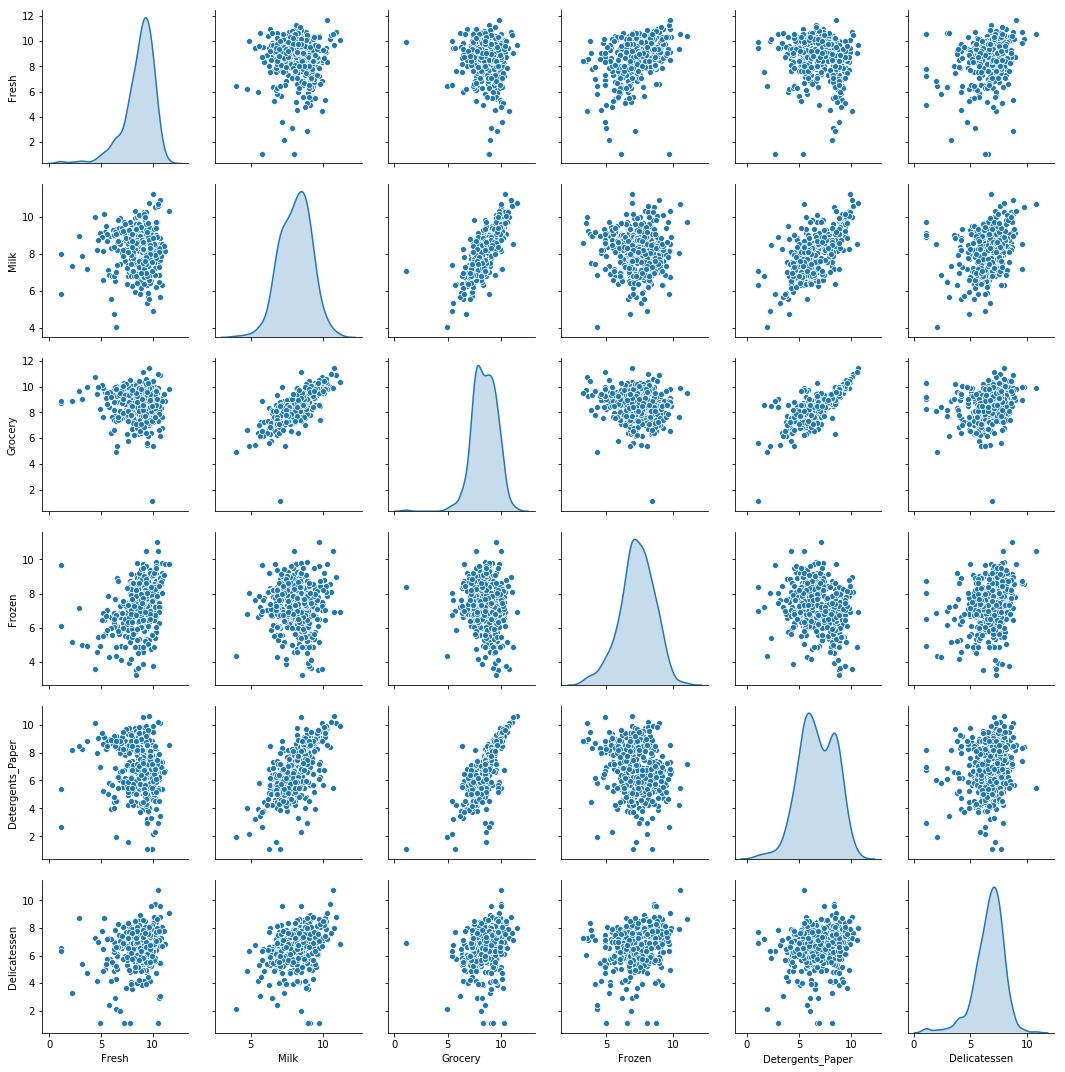

In [6]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
sns.pairplot(log_data, diag_kind = 'kde')

After applying a natural logarithm scaling to the data, the distribution of each feature appears much more normal. Compared to the correlation before the transformation, the presented correlation chages as follows:
 - Milk Vs. Detergents_Paper : stronger
 - Grocery Vs. Milk : stronger
 - Grocery Vs. Detergents_Paper : weaker.

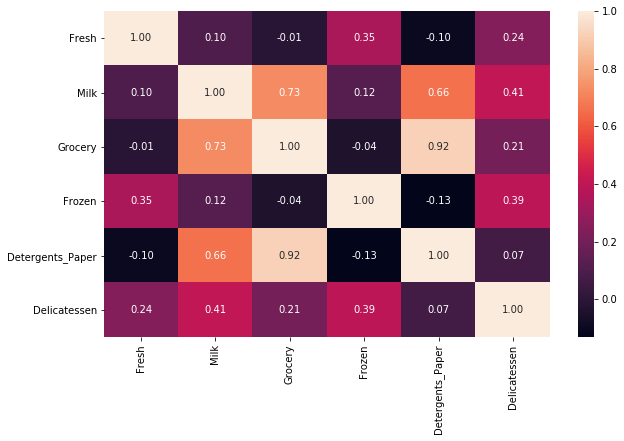

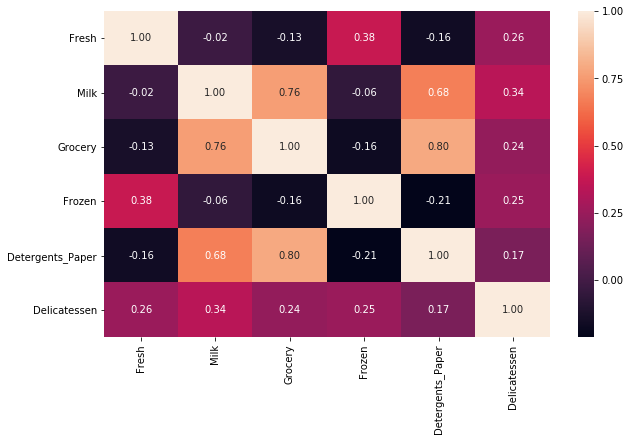

In [7]:
# Check the correlation between each feature
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.figure(figsize=(10,6))
sns.heatmap(log_data.corr(), annot=True, fmt=".2f")

In [8]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0  9.772581  8.416046   8.434246  6.971669          7.722678      7.661056
1  8.028455  9.490998  10.048756  8.279190          9.206232      6.594413
2  8.399760  6.809039   7.121252  8.182000          5.030438      6.921658

### Implementation: Outlier Detection
Let's use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). We will remove data points that are considered as outliers in all the features.

In [10]:
# initiate a list for the row index of the outliers
outliers_ind  = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    outliers=log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    
    for ind in list(outliers.index):
        outliers_ind.append(ind)

rep_outliers_ind = list(set([x for x in outliers_ind if outliers_ind.count(x) > 1]))

print('Row indices list for duplicated data points considered as outliers:\n', rep_outliers_ind)
# Remove the outliers, if the row indices are repeated shown in the outliers of every feature.
good_data = log_data.drop(log_data.index[rep_outliers_ind]).reset_index(drop = True)

Row indices list for duplicated data points considered as outliers:
 [128, 65, 66, 75, 154]


There are only five duplicated data points considered as outliers in all the features. They will be removed to make further exploration because they are presented as outliers more than once and nonrepresentative for the majority of customers.

## Feature Transformation
In this section we will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Using PCA helps us find out which compound combinations of features best describe customers.

### Implementation: PCA

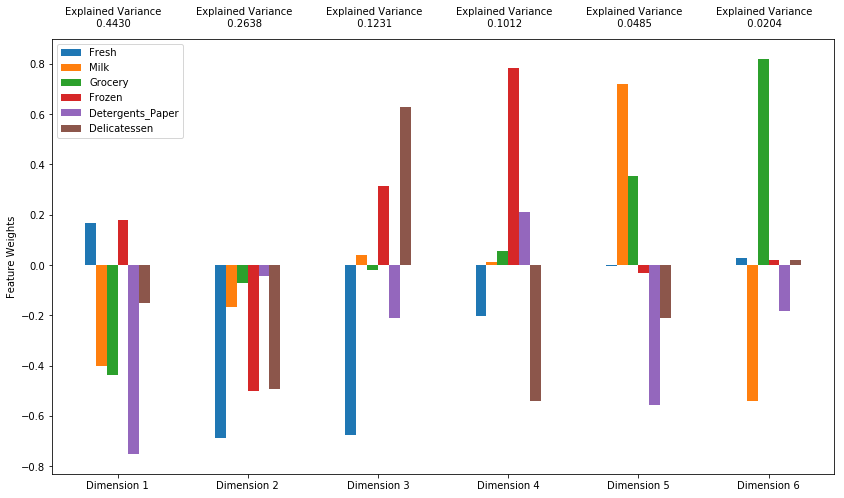

In [11]:
from sklearn.decomposition import PCA 
# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples =pca.transform(log_samples.values)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

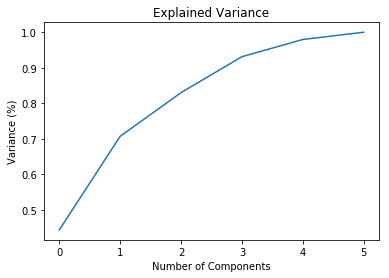

In [12]:
# Detect how many features should be kept
#Plotting the Cumulative Summation of the Explained Variance
pca_te = PCA().fit(good_data)
plt.figure()
plt.plot(np.cumsum(pca_te.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [13]:
# DataFrame of results
display(pca_results)

# DataFrame
display(type(pca_results))

# Cumulative explained variance should add to 1
display(pca_results['Explained Variance'].cumsum())

Explained Variance   Fresh    Milk  Grocery  Frozen  \
Dimension 1              0.4430  0.1675 -0.4014  -0.4381  0.1782   
Dimension 2              0.2638 -0.6859 -0.1672  -0.0707 -0.5005   
Dimension 3              0.1231 -0.6774  0.0402  -0.0195  0.3150   
Dimension 4              0.1012 -0.2043  0.0128   0.0557  0.7854   
Dimension 5              0.0485 -0.0026  0.7192   0.3554 -0.0331   
Dimension 6              0.0204  0.0292 -0.5402   0.8205  0.0205   

             Detergents_Paper  Delicatessen  
Dimension 1           -0.7514       -0.1499  
Dimension 2           -0.0424       -0.4941  
Dimension 3           -0.2117        0.6286  
Dimension 4            0.2096       -0.5423  
Dimension 5           -0.5582       -0.2092  
Dimension 6           -0.1824        0.0197

pandas.core.frame.DataFrame

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

The results show that selecting the first two principal components can preserve 70.68% of the total variance in the data. And selecting the first four components can preserve 93.11% of the total variance of the data. Let's breakdown the first four components. 

   - The first principal component (PC1):
     - Positively associated with spending on "Milk", "Grocery" and "Detergents_Paper"
     - Indicating these three features can best represent PC1 and are highly related
   - The second principal component (PC2):
     - Positively associated with spending on "Fresh", "Frozen" and "Delicatessen"
     - Indicating these three features can best represent PC2 and are highly related
     - The features in PC1 showing very small positive weights in PC2
 - The third principal component (PC3):
     - Positively associated with spending on "Delicatessen"
     - Negatively associated with spending on "Fresh"
     - Indicating these two features can best represent PC3
 - The four principal component (PC4):
     - Positively associated with spending on "Frozen"
     - Negatively associated with spending on "Delicatessen"
     - Indicating these two features can best represent PC4

In [14]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -0.8375      -1.0765      -0.3684      -0.8111      -0.5111   
1      -2.9903      -0.3645       0.2521       1.5653       0.1922   
2       2.5025       0.1006       1.0091       0.1630      -0.5126   

   Dimension 6  
0      -0.3040  
1       0.1244  
2      -0.0520

### Implementation: Dimensionality Reduction
(Using PCA)

In [17]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [18]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -0.8375      -1.0765
1      -2.9903      -0.3645
2       2.5025       0.1006

## Clustering

In this section, we will use a K-Means clustering algorithm to identify the various customer segments hidden in the data. K-Means clustering tries to minimize the distance within the same cluster via the nearest mean.

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create range of clusters 
range_n_clusters = list(range(2,11))

for n_clus in range_n_clusters:
    # Apply clustering algorithm of choice to the reduced data 
    clusters = KMeans().fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusters.predict(reduced_data)

    # Find the cluster centers
    centers = clusters.cluster_centers_

    # Predict the cluster for each transformed sample data point
    sample_preds = clusters.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='euclidean')
    display("For n_clusters = {}. The average silhouette_score is : {}".format(n_clus, score))

'For n_clusters = 2. The average silhouette_score is : 0.36633772644894225'

'For n_clusters = 3. The average silhouette_score is : 0.35404287869197854'

'For n_clusters = 4. The average silhouette_score is : 0.36532711749736063'

'For n_clusters = 5. The average silhouette_score is : 0.35298277671746003'

'For n_clusters = 6. The average silhouette_score is : 0.36684563650403823'

'For n_clusters = 7. The average silhouette_score is : 0.347578092544187'

'For n_clusters = 8. The average silhouette_score is : 0.3471976912320939'

'For n_clusters = 9. The average silhouette_score is : 0.3640549748840176'

'For n_clusters = 10. The average silhouette_score is : 0.3521198087188228'

According to the silhouette score, it seems that the best score is obtained when the number of clusters is 2.  

### Cluster Visualization
Let's visualize the optimal number of clusters. 

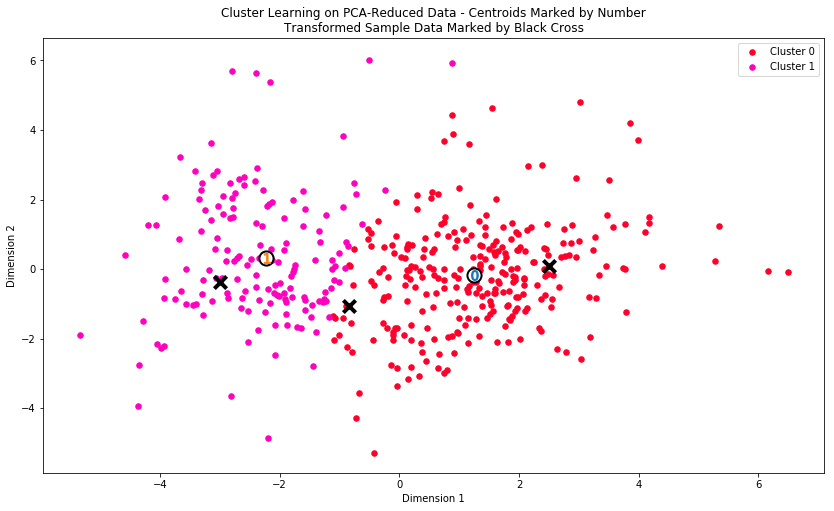

In [23]:
from sklearn.mixture import GaussianMixture
clusters = GaussianMixture(n_components=2).fit(reduced_data)
preds = clusters.predict(reduced_data)
centers = clusters.means_
sample_preds = clusters.predict(pca_samples)
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery

Each cluster has a central point in the visualization above. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data used for clustering undergo log transformation and dimension reduction, we need to apply the inverse transformations to recover the representative customer spending from these data points. 
In the code block below, you will need to implement the following:

In [24]:
import numpy as np
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  8939.0  2108.0   2758.0  2073.0             352.0         730.0
Segment 1  3567.0  7860.0  12249.0   873.0            4713.0         966.0

In [29]:
# Clusters' deviation from median
print('Deviation from median:')
display(true_centers - data.median())

# Clusters' deviation from mean
print('\nDeviation from mean:')
display(true_centers - data.mean())

Deviation from median:


Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0   435.0 -1519.0  -1997.5   547.0            -464.5        -235.5
Segment 1 -4937.0  4233.0   7493.5  -653.0            3896.5           0.5


Deviation from mean:


Fresh         Milk      Grocery       Frozen  \
Segment 0 -3061.297727 -3688.265909 -5193.277273  -998.931818   
Segment 1 -8433.297727  2063.734091  4297.722727 -2198.931818   

           Detergents_Paper  Delicatessen  
Segment 0      -2529.493182   -794.870455  
Segment 1       1831.506818   -558.870455

Deviations from mean doesn't look so meaningful due to all the negative values for Segment 0. Therefore, 
deviations from the median will be used and they are less likely to be affected by the outliers as well.

#### Segment 0:
 - Having spending on "Fresh" and "Frozen" above median
 - Most likely to represent retailers such as food markets. 

#### Segment 1:
 - Having spending on "Milk", "Grocery" and "Detergents_Paper" above median
 - Most likely to represent catering services and restaruants, etc.  

In [30]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


In [31]:
samples

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  17546   4519     4602    1066              2259          2124
1   3067  13240    23127    3941              9959           731
2   4446    906     1238    3576               153          1014

In [159]:
data.describe()

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

**Key takeaway:**

- Sample 1:
  - This belongs to cluster 0 where spending on 'Fresh' and 'Frozen' is over median.

- Sample 2:
  - This seems to be closer to cluster 1 where the spending on 'Milk', 'Grocery' and 'Detergents_Paper' is over median. Notably, the spending on 'Fresh' and 'Frozen' is over median as well. But the differences between the values ('Fresh' and 'Frozen') and their corresponding medians are relatively lower compared to the other cluster. Thus, it makes sense to cluster it as cluster 1.  

- Sample 3:
  - Since the spending on 'Fresh' and 'Frozen' is relatively high compared to the other categories, it seems more reasonable to cluster it as cluster 0.

## Conclusion

Finally, let's investigate our main goal: Which customer segment will be affected most after the changing of delivery time service? 

 - Impact on Segment 0:
  - Due to high amount of perishable products in Segment 0, like 'Fresh' products, it would be most affected by the prolonged delivery time. 

 - Impact on Segment 1:
  - Due to high amount of non-perishable products in Segment 1, reducing the delivery frequency per week would be less likely to affect this establishment. Intuitively, the impact on Segment 1's customers should be minimal.

In order to detect the impact on these two segements by this change, we will perform A/B testing. Specifically, we randomly sample 2 groups from each cluster: the change group and the control group for each cluster. Three metrics will be selected to measure customer satisfaction, such as, customer acquisition cost, customer satisfaction score and churn rate. Data will be acquired via a customer satisfaction survey for all the groups. It is assumed that customers with lower satisfaction scores would likely encounter a negative impact and tend to decrease their spending, whereas, those with higher satisfaction scores would likely encounter a positive impact and be prone to increase their spending in general. Meanwhile, we will look into the anomalies where customers show the negative association between the satisfaction score and the amount of money spent. 

After identifying the cluster groups, we can use it as a target label and suitable supervised classifier, such as, support vector machines, logistic regression, to classify the new customers based on their features. 

### Visualizing Underlying Distributions

Let's reintroduce the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.


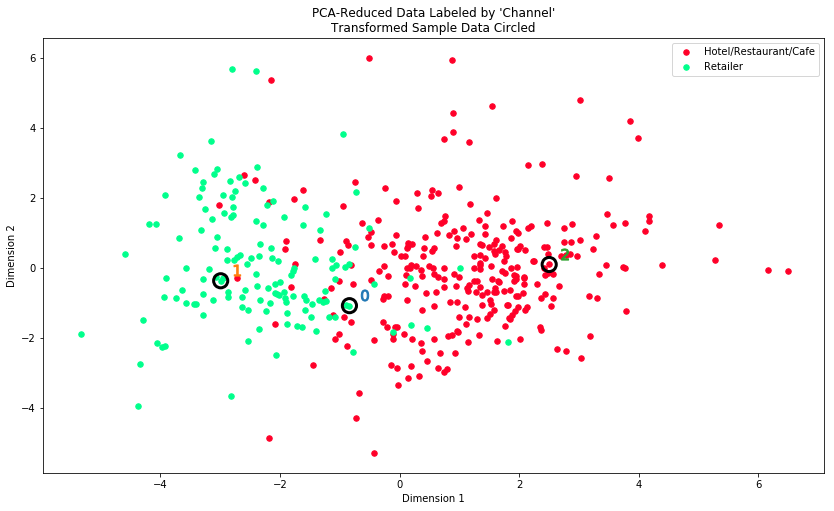

In [32]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, rep_outliers_ind, pca_samples)

The plot above suggests that the number of clusters is consistent with the underlying distribution with two major clusters, therefore, the clustering algorithm does the good job. Customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' locate on the extreme left and right of the plot, respectively. These classifications are consistent with the observation where cluster 0 customers tend to be classfied as catering services/restaurants and cluster 1 customers tend to be classfied as retailer/food markets.